In [18]:
import os
import time
import matplotlib.pyplot as plt

import numpy as np

from mockfactory import Catalog, RedshiftDensityInterpolator, utils
from pypower import CatalogFFTPower, CatalogSmoothWindow, PowerSpectrumSmoothWindow, PowerSpectrumOddWideAngleMatrix, PowerSpectrumSmoothWindowMatrix, setup_logging

In [24]:
os.path.join('/global/cfs/cdirs/desi/users/mpinon/', 'xi/corr_func_mock{}_{}_{}{}.npy'.format('0', 'ELG_LOP', 'complete_', 'SGC'))

'/global/cfs/cdirs/desi/users/mpinon/xi/corr_func_mock0_ELG_LOP_complete_SGC.npy'

In [25]:
from pycorr import TwoPointCorrelationFunction

In [42]:
xi = TwoPointCorrelationFunction.load(os.path.join('/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/', 'xi/corr_func_mock{}_{}_{}{}.npy'.format('0', 'ELG_LOP', 'complete_', 'SGC')))

In [49]:
xi.select((30., 150., 4.)).sep[:, 0]

array([ 30.08602286,  34.07593139,  38.06794892,  42.06139308,
        46.05603193,  50.05139039,  54.04763155,  58.04428019,
        62.04139378,  66.03868641,  70.03651911,  74.03438728,
        78.03264675,  82.03095768,  86.02942197,  90.0280538 ,
        94.02681625,  98.02560497, 102.02458239, 106.02359961,
       110.02262948, 114.02179833, 118.02101667, 122.02021493,
       126.01954657, 130.01890885, 134.01827652, 138.01765768,
       142.01716686, 146.01662211, 150.01609799])

In [20]:
import sys
sys.path.append('../bin')
from cov_utils import read_xi_cov

In [58]:
cov = read_xi_cov(tracer="ELG_LOPnotqso", region="SGC", version="0.6", zmin=0.8, zmax=1.1, ells=(0, 2, 4), smin=30, smax=151, recon_algorithm=None, recon_mode='recsym', smoothing_radius=15)

In [59]:
cov.shape[0]/3

30.0

In [57]:
np.arange(30, 151, 4)

array([ 30,  34,  38,  42,  46,  50,  54,  58,  62,  66,  70,  74,  78,
        82,  86,  90,  94,  98, 102, 106, 110, 114, 118, 122, 126, 130,
       134, 138, 142, 146, 150])

In [63]:
dat = Catalog.read('/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/LRG_full_HPmapcut.dat.fits')

In [64]:
dat.size

3461048

In [93]:
omega = 8*(12/812.7)**2*(np.pi/180)**2
alpha = np.arccos(1 - omega/(2*np.pi))
theta = 2*alpha*180/np.pi
theta

0.04712496515925492

In [65]:
mask = (dat['GOODHARDLOC']==True) & (dat['ZWARN']!=999999)
dat[mask].size

2400089

In [62]:
dat = Catalog.read('/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/LRG_full_noveto.dat.fits')
dat.size

5243196

In [17]:
dat = Catalog.read('/global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit/mock0/ffa_full_ELG_LOP.fits')

In [18]:
dat

Catalog(csize=13117733, size=13117733, columns=['LOCATION', 'FIBER', 'TARGETID', 'RA', 'DEC', 'TRUEZ', 'STATUS', 'RSDZ', 'PRIORITY_INIT', 'PRIORITY', 'DESI_TARGET', 'NUMOBS_MORE', 'NUMOBS_INIT', 'BRICKID', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'BGS_TARGET', 'MWS_TARGET', 'SUBPRIORITY', 'BRICKNAME', 'OBSCONDITIONS', 'SCND_TARGET', 'ZWARN', 'COLLISION', 'TILEID', 'TSNR2_ELG', 'TSNR2_LYA', 'TSNR2_BGS', 'TSNR2_QSO', 'TSNR2_LRG', 'TILELOCID', 'NTILE', 'TILES', 'TILELOCIDS', 'WEIGHT_IIP', 'BITWEIGHT', 'PHOTSYS'])

In [46]:
tracer = 'ELG_LOP'
completeness = 'ffa_'
catalog_dir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit/mock0/'
data_fn = os.path.join(catalog_dir, '{}_{}SGC_clustering.dat.fits'.format(tracer, completeness))
data = Catalog.read(data_fn)
#import fitsio
#data = fitsio.read(data_fn)

In [47]:
np.sum(data['WEIGHT'])

array(614749.0634807966)

In [48]:
catalog_dir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit/mock0'
randoms_fn = os.path.join(catalog_dir, '{}_{}SGC_0_clustering.ran.fits'.format(tracer, completeness))
randoms = Catalog.read(randoms_fn)

In [49]:
np.sum(randoms['WEIGHT'])

array(6599541.3821661025)

In [50]:
20/(np.sum(randoms['WEIGHT'])/np.sum(data['WEIGHT']))

array(1.8630054056241816)

In [10]:
16*140/60

37.333333333333336

In [70]:
import sys
sys.path.append('../bin')
from power_spectrum import select_region
test = select_region('SGC', data, (0.8, 1.6))
print(np.sum(test['WEIGHT']))
print("{:e}".format(np.sum(test['WEIGHT'])**2 - np.sum(test['WEIGHT']**2)))

4531023
2.053016e+13


In [71]:
from power_spectrum import select_data
d, ran = select_data(data_type='Y1secondgenmocks', imock=0, nrandoms=1, tracer='ELG_LOP', region='SGC', completeness='complete_', zrange=(0.8, 1.6))

In [59]:
np.sum(d['WEIGHT'])

array(4531023)

In [60]:
np.mean(d['WEIGHT'])

array(1.0)

In [45]:
print("{:e}".format(np.sum(d['WEIGHT'])**2 - np.sum(d['WEIGHT']**2)))

2.053016e+13


In [4]:
mask = np.full(data.size, 1, dtype='bool')
mask = (data['RA'] < 88) | (data['RA'] > 303)
mask = np.logical_and(mask, (data['Z'] >= 1.1) & (data['Z'] <= 1.6))

In [5]:
np.sum(data[mask]['WEIGHT'])

array(1786114.9171482325)

In [22]:
tets = data[mask]

In [25]:
data1 = Catalog.read('/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1v1/mock0/LSScats/ELG_N_clustering.dat.fits')

In [26]:
data1['WEIGHT']*data1['WEIGHT_FKP']

array([0.88478879 0.88478879 2.37214437 ... 1.03516297 0.59496679 1.18993357])

In [27]:
np.sum(data1['WEIGHT']*data1['WEIGHT_FKP'])

array(670465.8718860048)

In [12]:
tracer = 'ELG'
completeness = 'complete_'

In [4]:
parent_path = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/'
cutsky_fn = os.path.join(parent_path, 'ELG', 'z1.100', 'cutsky_ELG_z1.100_AbacusSummit_base_c000_ph000.fits')
data = Catalog.read(cutsky_fn)

In [5]:
from mockfactory import Catalog, RandomBoxCatalog, RandomCutskyCatalog, DistanceToRedshift, TabulatedRadialMask, box_to_cutsky, utils, setup_logging
from mockfactory.desi.footprint import is_in_desi_footprint
from cosmoprimo.fiducial import DESI
import desimodel
import os

target_type = 'ELG_LOP'
zmin = 0.8
zmax = 1.6
cosmo = DESI()
dmin = cosmo.comoving_radial_distance(0.8)
dmax = cosmo.comoving_radial_distance(1.6)

boxsize = dmax * 2.
boxcenter = 0.
nbar = 1e-6
seed = 0

outdir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/'
nz_file = os.path.join(outdir, 'nz/NZ_{}.dat'.format(target_type))
outfile=os.path.join(outdir, 'randoms_{:d}.fits'.format(0))
                       
randoms = RandomBoxCatalog(boxsize=boxsize, boxcenter=boxcenter, nbar=nbar, seed=seed)
distances = np.sum(randoms['Position']**2, axis=1)
randoms_cut = randoms[np.logical_and(distances <= dmax**2, distances >= dmin**2)]
print(randoms_cut)

drange, rarange, decrange = box_to_cutsky(boxsize=boxsize, dmax=dmax)
print(drange, rarange, decrange)

#randoms_cutsky = RandomCutskyCatalog(rarange=(0., 360.-1e-9), decrange=(-90., 90.), drange=(dmin, dmax), csize=int(nbar*boxsize**3), seed=0)
randoms_cutsky = randoms_cut.cutsky(drange=drange, rarange=(-180.0, 180.0-1e-9), decrange=(-90.0, 90.0-1e-9), noutput=1)
print(randoms_cutsky)

# n(z)
mask_radial = TabulatedRadialMask(z=None, filename=nz_file, interp_order=1)
distance_to_redshift = DistanceToRedshift(distance=cosmo.comoving_radial_distance)
#randoms_cutsky['Distance'], randoms_cutsky['RA'], randoms_cutsky['DEC'] = utils.cartesian_to_sky(randoms_cutsky.position)
randoms_cutsky['Z'] = distance_to_redshift(randoms_cutsky['Distance'])
#print(randoms_cutsky)
#print(randoms_cutsky['Distance'])
#mask_nz = mask_radial(randoms_cutsky['Z'], seed=seed)
#mask_y1 = is_in_desi_footprint(randoms_cutsky['RA'], randoms_cutsky['DEC'], release='y1')
#mask = mask_nz & mask_y1
#randoms_cutsky = randoms_cutsky[mask]

$DESI_SPECTRO_REDUX is not set in the current environment. No assurance for the existence of files. Default path will be used: /global/cfs/cdirs/desi/spectro/redux
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


RandomBoxCatalog(csize=99904, size=99904, columns=['Position'])
(0, array(3143.44696179)) (-180.0, 180.0) (-90.0, 90.0)
CutskyCatalog(csize=26735, size=26735, columns=['Position', 'RA', 'DEC', 'Distance'])


In [31]:
randoms_cutsky = Catalog.read("/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/randoms_ELG_LOP_0.fits")
data_cutsky = Catalog.read("/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/SeconGen_mock_ELG_LOP_0_Y1.fits")
#data_cutsky_list = [Catalog.read("/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/SeconGen_mock_ELG_LOP_{}_Y1.fits".format(i)) for i in range(0, 25)]

In [32]:
from power_spectrum import select_region

In [33]:
data_cutsky = select_region('NGC', data_cutsky)

In [34]:
from mockfactory import sky_to_cartesian
position = sky_to_cartesian(cosmo.comoving_radial_distance(data_cutsky['Z']), data_cutsky['RA'], data_cutsky['DEC'])
print('xmin: ', np.min(position[..., 0]))
print('xmax: ', np.max(position[..., 0]))
print('ymin: ', np.min(position[..., 1]))
print('ymax: ', np.max(position[..., 1]))

print('zmin: ', np.min(position[..., 2]))
print('zmax: ', np.max(position[..., 2]))

xmin:  -3150.7632
xmax:  601.4643
ymin:  -3072.7034
ymax:  2713.3416
zmin:  -564.128
zmax:  3085.0479


In [28]:
positionSGC = position

In [40]:
mask2 = np.random.uniform(0., 1., len(position[..., 0])) < 0.01
mask1 = np.random.uniform(0., 1., len(positionSGC[..., 0])) < 0.01

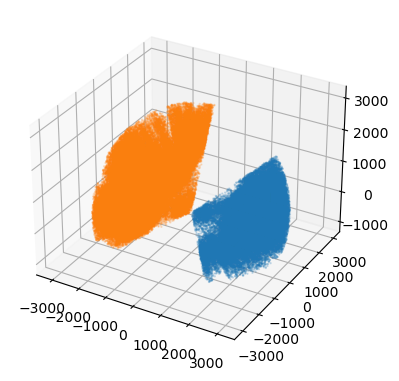

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(122, projection='3d', title=None)
ax.scatter(positionSGC[..., 0][mask1], positionSGC[..., 1][mask1], positionSGC[..., 2][mask1], alpha=0.2, s=0.5, color='C0')
ax.scatter(position[..., 0][mask2], position[..., 1][mask2], position[..., 2][mask2], alpha=0.2, s=0.5, color='C1')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


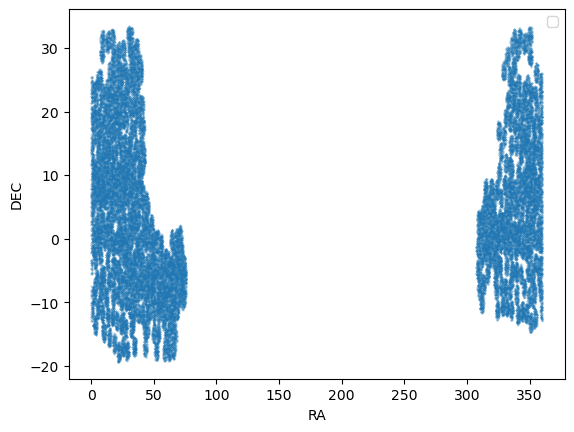

In [21]:
mask = np.random.uniform(0., 1., data_cutsky.size) < 0.01

plt.scatter(data_cutsky['RA'][mask], data_cutsky['DEC'][mask], alpha=0.5, s=0.1, color='C0')

plt.xlabel("RA")
plt.ylabel("DEC")
plt.legend()
plt.show()

In [48]:
data_Y1 = Catalog.read("/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/ELG_LOPnotqso_0_full.ran.fits")

In [47]:
data_Y1_NGC

Catalog(csize=9719822, size=9719822, columns=['TARGETID', 'RA', 'DEC', 'NTILE', 'FRAC_TLOBS_TILES', 'Z', 'WEIGHT', 'WEIGHT_SYS', 'WEIGHT_COMP', 'WEIGHT_ZFAIL', 'WEIGHT_FKP', 'TARGETID_DATA', 'WEIGHT_SN', 'NX', 'WEIGHT_RF'])

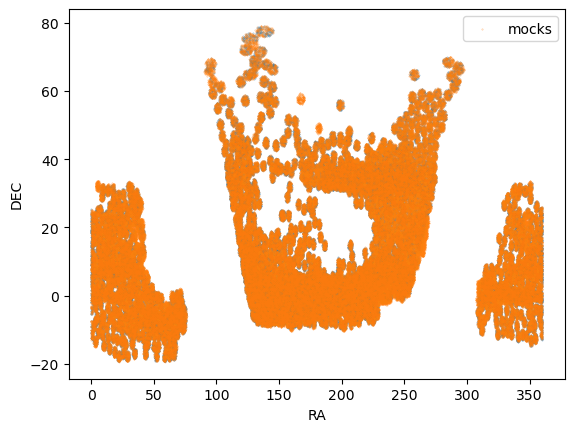

In [32]:
mask1 = np.random.uniform(0., 1., data_Y1_NGC.size) < 0.01
mask2 = np.random.uniform(0., 1., data_Y1_SGC.size) < 0.01
mask_randoms = np.random.uniform(0., 1., randoms_cutsky.size) < 0.01

plt.scatter(data_Y1_NGC['RA'][mask1], data_Y1_NGC['DEC'][mask1], alpha=0.5, s=0.1, color='C0')
plt.scatter(data_Y1_SGC['RA'][mask2], data_Y1_SGC['DEC'][mask2], alpha=0.5, s=0.1, color='C0')
plt.scatter(randoms_cutsky['RA'][mask_randoms], randoms_cutsky['DEC'][mask_randoms], alpha=0.5, s=0.1, color='C1', label='mocks')

plt.xlabel("RA")
plt.ylabel("DEC")
plt.legend()
plt.show()

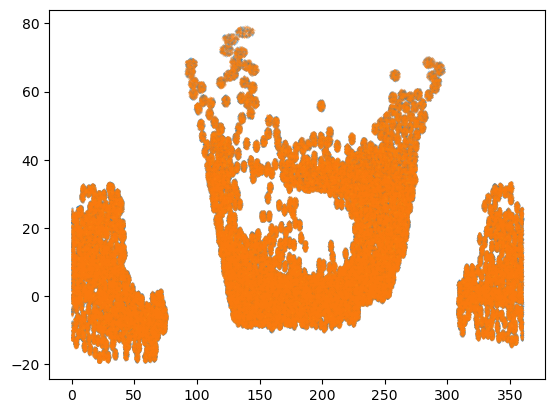

In [52]:
mask_data = np.random.uniform(0., 1., data_cutsky.size) < 0.01
mask_randoms = np.random.uniform(0., 1., randoms_cutsky.size) < 0.01
plt.scatter(randoms_cutsky['RA'][mask_randoms], randoms_cutsky['DEC'][mask_randoms], alpha=0.5, s=0.1)
plt.scatter(data_cutsky['RA'][mask_data], data_cutsky['DEC'][mask_data], alpha=0.5, s=0.1)
plt.show()

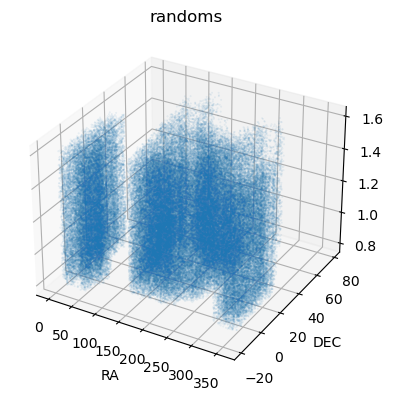

In [34]:
fig = plt.figure(figsize=(10, 6))
#ax = fig.add_subplot(121, projection='3d', title='data')
#ax.scatter(data_cutsky['RA'][::1000], data_cutsky['DEC'][::1000], data_cutsky['Z'][::1000], marker='.', alpha=0.1, s=0.5)
#ax.set_xlabel('RA')
#ax.set_ylabel('DEC')
#ax.set_zlabel('z')
ax = fig.add_subplot(122, projection='3d', title='randoms')
ax.scatter(randoms_cutsky['RA'][::100], randoms_cutsky['DEC'][::100], randoms_cutsky['Z'][::100], marker='.', alpha=0.1, s=0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('z')
plt.show()

In [35]:
def compute_nz(catalog):
    mpicomm = catalog.mpicomm
    import healpy as hp
    import mpytools as mpy
    nside = 512
    theta, phi = np.radians(90 - catalog['DEC']), np.radians(catalog['RA'])
    hpindex = hp.ang2pix(nside, theta, phi, lonlat=False)
    hpindex = mpy.gather(np.unique(hpindex), mpicomm=mpicomm, mpiroot=0)
    fsky = mpicomm.bcast(np.unique(hpindex).size if mpicomm.rank == 0 else None, root=0) / hp.nside2npix(nside)
    area = fsky * 4. * np.pi * (180. / np.pi)**2
    #alpha = data['WEIGHT'].csize / randoms['WEIGHT'].csum()
    cosmo = DESI()
    if "Z_COSMO" in catalog.columns():
        z = catalog['Z_COSMO']
    else:
        z = catalog['Z']
    density = RedshiftDensityInterpolator(z=z, weights=None, bins=30, fsky=fsky, distance=cosmo.comoving_radial_distance)
    return density

In [36]:
nz_data = compute_nz(data_cutsky)
nz_randoms = compute_nz(randoms_cutsky)

In [201]:
nbar = [compute_nz(data_cutsky_list[i]).nbar for i in range(25)]

In [190]:
nz_data_final = compute_nz(data)

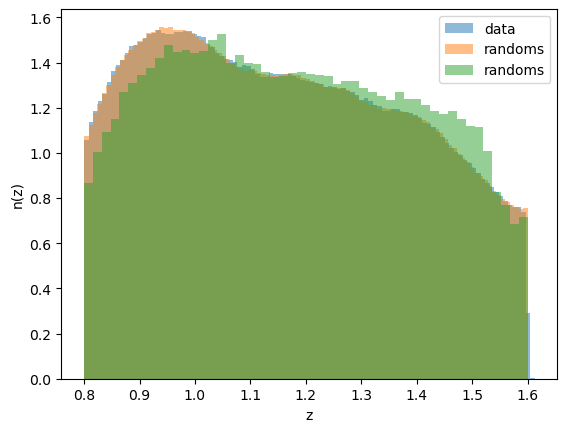

In [25]:
#plt.hist(data_cutsky['Z_COSMO'][data_cutsky['Z_COSMO']>0.8], density=True, bins=100, alpha=0.5, label="data")
plt.hist(data_cutsky['Z'][data_cutsky['Z']>0.8], density=True, bins=100, alpha=0.5, label="data")
plt.hist(randoms_cutsky['Z'], density=True, bins=100, alpha=0.5, label="randoms")
plt.hist(np.concatenate((data_Y1_NGC['Z'], data_Y1_SGC['Z'])), density=True, bins=50, alpha=0.5, label="randoms")
plt.xlabel('z')
plt.ylabel('n(z)')
plt.legend()
plt.show()

In [37]:
nz_data_Y1 = compute_nz(Catalog.concatenate((data_Y1_NGC, data_Y1_SGC)))

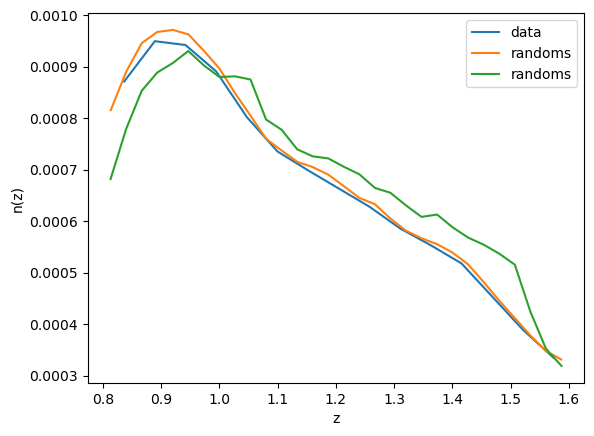

In [39]:
plt.plot(nz_data.z[nz_data.z>0.8], nz_data.nbar[nz_data.z>0.8], label="data")
plt.plot(nz_randoms.z, nz_randoms.nbar, label="randoms", color='C1')
plt.plot(nz_data_Y1.z, nz_data_Y1.nbar, label="randoms", color='C2')
plt.xlabel('z')
plt.ylabel('n(z)')
plt.legend()
plt.show()

In [ ]:
z, nbar, w1, w2 = np.loadtxt(os.path.join(outdir, 'nz/NZ_{}.dat'.format('ELG')), unpack=True)

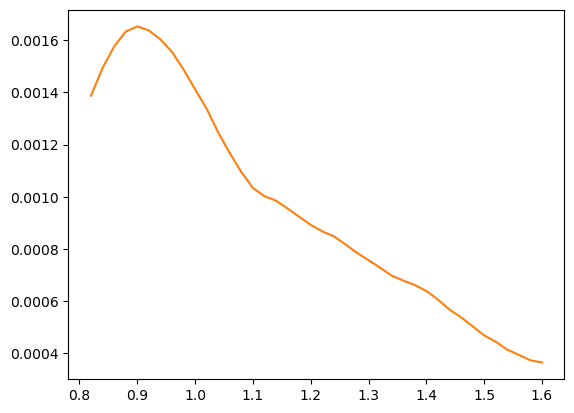

In [ ]:
plt.plot(z[z>0.8], nbar[z>0.8], color='C1')
#plt.scatter(data_cutsky[::100]['Z'], data_cutsky[::100]['NZ'], s=0.5)
plt.show()

In [47]:
from mockfactory import TabulatedRadialMask

outdir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/'
mask_radial = TabulatedRadialMask(z=None, filename=os.path.join(outdir, 'nz/NZ_{}.dat'.format(tracer)), interp_order=3)

In [13]:
catalog_dir = '/global/u2/m/mpinon'
data_fn = os.path.join(catalog_dir, '{}_{}gtlimaging_clustering.dat.fits'.format(tracer, completeness))
data_test = Catalog.read(data_fn)
data_test

Catalog(csize=4235900, size=4235900, columns=['LOCATION', 'FIBER', 'TARGETID', 'RA', 'DEC', 'Z', 'PRIORITY_INIT', 'PRIORITY', 'DESI_TARGET', 'BRICKID', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'ZWARN', 'COLLISION', 'TILEID', 'WEIGHT', 'lrg_mask'])

In [77]:
np.isin(data['TARGETID'], catalog['id']).any()

False

In [75]:
data['FIBER']

array([ 932  753 4297 ... 1236  739 2957])

In [13]:
catalog_fn = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/CubicBox/QSO/z1.400/AbacusSummit_base_c000_ph000/QSO_real_space.fits'
catalog = Catalog.read(catalog_fn)

In [14]:
catalog.size / 2000**3

0.0001694805

In [80]:
!ls -l /global/cfs/cdirs/desi/cosmosim/SecondGenMocks/

total 4
drwxrws--- 3 acarnero desi 4096 Aug 14 08:20 AbacusSummit
drwxrws--- 5 dforero  desi 4096 Sep  7 06:12 Clustering
drwxrwsr-x 6 sihany   desi 4096 Aug 10 15:24 CubicBox
drwxrws--- 3 dforero  desi 4096 Sep  1 15:49 Post


In [46]:
catalog['x'].min()

array(-1000.762672527825)

In [47]:
catalog['x'].max()

array(1000.7791580445682)

In [69]:
catalog['id']

array([          26004001          304001000          305001000 ...
 170016901053000000 170016941119000000 170016970830000000])

In [59]:
imock = 0
ranidx = 0

print('FIRST GEN')

for imock in range(0, 25):
    #catalog_dir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit/mock{:d}/'.format(imock)
    catalog_dir = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1v1/mock{:d}/LSScats'.format(imock)
    #data_fn = os.path.join(catalog_dir, '{}_{}gtlimaging_clustering.dat.fits'.format(tracer, completeness))
    data_N_fn = os.path.join(catalog_dir, '{}_{}N_clustering.dat.fits'.format(tracer, completeness))
    data_N = Catalog.read(data_N_fn)
    data_S_fn = os.path.join(catalog_dir, '{}_{}S_clustering.dat.fits'.format(tracer, completeness))
    data_S = Catalog.read(data_S_fn)
    
    data = Catalog.concatenate([data_N, data_S])
    print("data size: ", data.size)
    rdsizesum = 0
    for ranidx in range(0, 1):
        #randoms_fn = os.path.join(catalog_dir, '{}_{}gtlimaging_{}_clustering.ran.fits'.format(tracer, completeness, ranidx))
        randoms_N_fn = os.path.join(catalog_dir, '{}_{}N_0_clustering.ran.fits'.format(tracer, completeness))
        randoms_N = Catalog.read(randoms_N_fn)
        randoms_S_fn = os.path.join(catalog_dir, '{}_{}S_0_clustering.ran.fits'.format(tracer, completeness))
        randoms_S = Catalog.read(randoms_S_fn)
        randoms = Catalog.concatenate([randoms_N, randoms_S])
        print("random size: ", randoms.size)
        rdsizesum += randoms.size
    print("total rd size:", rdsizesum)
    ratio = rdsizesum / data.size
    print("size ratio:", ratio)

FIRST GEN
data size:  11425812
random size:  47306759
total rd size: 47306759
size ratio: 4.1403410978580775
data size:  11454337
random size:  47352856
total rd size: 47352856
size ratio: 4.134054725297501
data size:  11451103
random size:  47350916
total rd size: 47350916
size ratio: 4.135052841634557
data size:  11426525
random size:  47324299
total rd size: 47324299
size ratio: 4.141617770932108
data size:  11460463
random size:  47371985
total rd size: 47371985
size ratio: 4.133514064833157
data size:  11400058
random size:  47080550
total rd size: 47080550
size ratio: 4.129851795490865
data size:  11460749
random size:  46337005
total rd size: 46337005
size ratio: 4.043104425373944
data size:  11442610
random size:  47288076
total rd size: 47288076
size ratio: 4.132630230340805
data size:  11439163
random size:  47291406
total rd size: 47291406
size ratio: 4.134166634394492
data size:  11433870
random size:  47306184
total rd size: 47306184
size ratio: 4.137372910484377
data size

In [3]:
print("SECOND GEN")

tracer = 'ELG_LOP' if tracer == 'ELG' else tracer
    
for imock in range(0, 1):
    catalog_dir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit/mock{:d}/'.format(imock)
    data_fn = os.path.join(catalog_dir, '{}_{}gtlimaging_clustering.dat.fits'.format(tracer, completeness))
    data = Catalog.read(data_fn)
    print("data size: ", data.size)
    rdsizesum = 0
    for ranidx in range(0, 15):
        randoms_fn = os.path.join(catalog_dir, '{}_{}gtlimaging_{}_clustering.ran.fits'.format(tracer, completeness, ranidx))
        randoms = Catalog.read(randoms_fn)
        print("random size: ", randoms.size)
        rdsizesum += randoms.size
    print("total rd size:", rdsizesum)
    ratio = rdsizesum / data.size
    print("size ratio:", ratio)

SECOND GEN
data size:  12549728
random size:  18984004
random size:  18983022
random size:  18985423
random size:  18983622
random size:  18985523
random size:  18983567
random size:  18985734
random size:  18981724
random size:  18984592
random size:  18984256
random size:  18982754
random size:  18983509
random size:  18979404
random size:  18987224
random size:  18983088
total rd size: 284757446
size ratio: 22.69032810910324


In [4]:
data

Catalog(csize=12549728, size=12549728, columns=['LOCATION', 'FIBER', 'TARGETID', 'RA', 'DEC', 'Z', 'PRIORITY_INIT', 'PRIORITY', 'DESI_TARGET', 'BRICKID', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS', 'ZWARN', 'COLLISION', 'TILEID', 'WEIGHT'])